### 1. Your views about the problem statement?
Designing a machine learning model to determine salaries for new hires is crucial for effective human resource management. By using historical salary data and relevant features, such as job roles and locations, the model can offer competitive and fair salary offers. This helps improve employee satisfaction and enhances talent acquisition. Choosing the right regression model, like linear regression or more complex ones such as decision trees or random forests, is important for accurately predicting salaries. Evaluating the model with metrics like Mean Squared Error and ensuring fairness in predictions are also key considerations. Once deployed and integrated into HR processes, the model should be regularly updated and monitored for ethical and security compliance.

### 2. What will be your approach to solving this task?
To predict Cost To Company (CTC) using various factors, we'll follow a systematic approach:

1.Data Preprocessing: First, understand the dataset, handle any missing data, and convert categorical variables into numerical forms. This step prepares the data for analysis.

2.Data Splitting: Split the dataset into two parts: one for training the models and the other for testing their performance on unseen data.

3.Model Selection: Choose several regression models suitable for the task, like Linear Regression, Random Forest, or Gradient Boosting. Implement these models using Python libraries.

4.Hyperparameter Tuning: Optimize each model by tuning its parameters to achieve the best performance. Techniques like Grid Search help find the optimal settings.

5.Model Evaluation: Evaluate each model's accuracy using metrics like R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Compare these metrics to determine the most effective model.

6.Preventing Overfitting: Guard against overfitting by using techniques such as regularization and cross-validation. These methods ensure that the model generalizes well to new data.

7.Model Deployment: Once the best model is identified, train it on the entire dataset to maximize its learning. Deploy the model to make predictions on new data.

8.Continuous Improvement: Monitor the model's performance over time, gathering feedback to refine it further with new data or techniques as needed.

This approach ensures a thorough and effective method for predicting CTC using machine learning.

### 3. What were the available ML model options you had to perform this task?
When predicting Cost To Company (CTC) based on different factors, several machine learning models can be considered:
Linear Regression,
Random Forest,
Gradient Boosting,
XGBoost,
Lasso Regression,
Support Vector Regression (SVR),
Neural Networks,
LightGBM and
K-Nearest Neighbors (KNN) Regression.
Each model has unique strengths and weaknesses, performing differently based on dataset characteristics. Experimentation, hyperparameter tuning, and evaluation with metrics are crucial to determine the best model for predicting CTC accurately. Ensemble methods like stacking can further enhance predictive performance by combining multiple models' outputs.

### 4.Which model’s performance is best and what could be the possible reason for that?
XGBoost is giving the best performance for our data, even though Random Forest technically shows better values. We're skipping Random Forest because it doesn't handle skewed data well, and our data is positively skewed. Additionally, Random Forest takes a lot of time. XGBoost, on the other hand, performs well with skewed data compared to other ensemble techniques. Regression Trees also outperform Ordinary Least Squares (OLS) in multiple linear regression since OLS struggles with too many features, whereas Trees do not. Ensemble techniques, like boosting, combine the results of multiple regression trees. Unlike other ensemble methods where trees are trained separately, boosting trains models sequentially, with each new model correcting the errors of the previous one until no further improvement is made, leading to higher accuracy. Interestingly, graduation marks and education have emerged as more important features than Role, contrary to what the correlation matrix initially indicated.

### 5. What steps can you take to improve this selected model’s performance even further?
To enhance the performance of your chosen model, consider these strategies:

1.Feature Engineering: Create new features that better capture relationships between variables, leveraging domain knowledge for more informative inputs.

2.Data Cleaning: Ensure data cleanliness and handle missing values effectively to prevent information loss.

3.Outlier Handling: Identify and manage outliers in the data to improve model accuracy and reliability.

4.Feature Scaling: Normalize or standardize numerical features to ensure all variables are on a comparable scale, which often helps algorithms perform better.

5.Hyperparameter Tuning: Continuously optimize model parameters using techniques like Grid Search or Random Search to find the best settings.

6.Ensemble Methods: Combine multiple models using bagging or boosting techniques to reduce overfitting and improve predictive accuracy.

7.Cross-Validation: Use methods like k-fold cross-validation to validate model performance and prevent overfitting.

8.Regularization: Apply techniques like Lasso or Ridge regularization to prevent overfitting in linear models.

9.Feature Selection: Identify and select the most impactful features to simplify the model and remove noise.

10.Data Augmentation: Generate synthetic data points to increase dataset diversity and improve model generalization.

11.Model Stacking: Combine predictions from multiple models as inputs to a meta-model to enhance overall performance.

12.Domain Expertise: Seek insights from domain experts to refine feature engineering and model design.

13.Regular Updates: Periodically update the model with new data to maintain accuracy and adapt to changing patterns.

Improving model performance is an ongoing process of experimentation and refinement. By implementing these strategies iteratively and monitoring results, you can achieve better predictive accuracy and generalization capabilities.

# 1. Data Collection

In [1]:
# Importing required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Internship stuff/ML/Final ML Project/ML case Study.csv',header=0)
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [3]:
college = pd.read_csv('C:/Users/DELL/OneDrive/Documents/Internship stuff/ML/Final ML Project/Colleges.csv',header=0)
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [4]:
cities = pd.read_csv('C:/Users/DELL/OneDrive/Documents\Internship stuff/ML/Final ML Project/cities.csv',header=0)
cities.head()

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7712\1121086295.py:1: SyntaxWarning: invalid escape sequence '\I'
  cities = pd.read_csv('C:/Users/DELL/OneDrive/Documents\Internship stuff/ML/Final ML Project/cities.csv',header=0)


,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [5]:
# Converting college data into lists based on tiers
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [6]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [7]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [8]:
# Convert Cities data into lists
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [9]:
for item in df.City:
    if item in metro_city:
        df["City"].replace(item,1,inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item,0,inplace=True)

In [10]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


# 2. Data Preprocessing

### Missing value Imputation

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


NOTE: No missing values found

### Dummy Variable creation

In [12]:
df = pd.get_dummies(df, columns=['Role'], drop_first=True).astype({"Role_Manager": "int"})

In [13]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [14]:
# Correlation Matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


### Outliers Treatment

In [15]:
df.describe() 

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


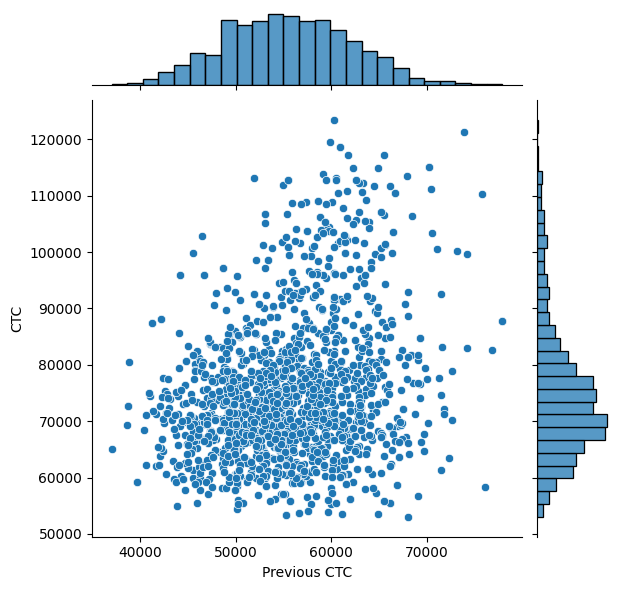

In [16]:
# jointplot between "Previous CTC" and "CTC".
sns.jointplot(x = "Previous CTC", y = "CTC", data = df)

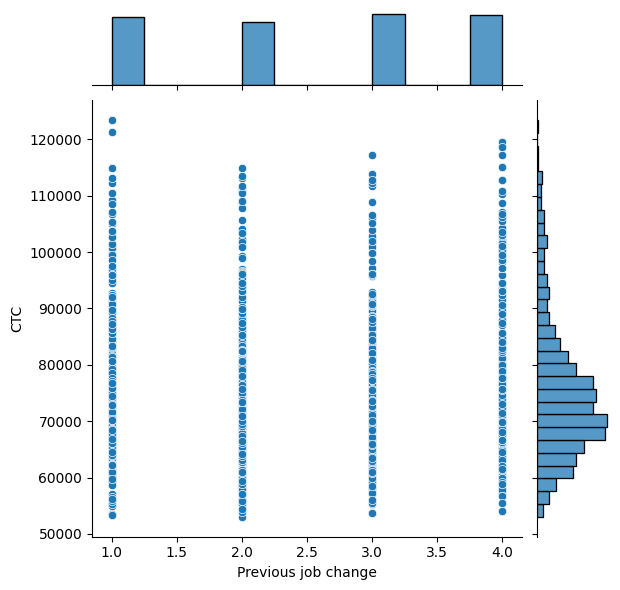

In [17]:
# jointplot between "Previous job change" and "CTC".
sns.jointplot(x = "Previous job change", y = "CTC", data = df)

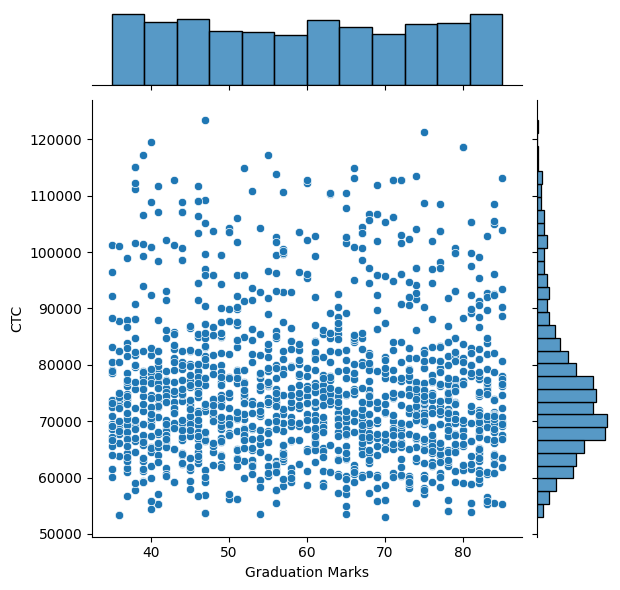

In [18]:
# jointplot between "Graduation Marks" and "CTC".
sns.jointplot(x = "Graduation Marks", y = "CTC", data = df)

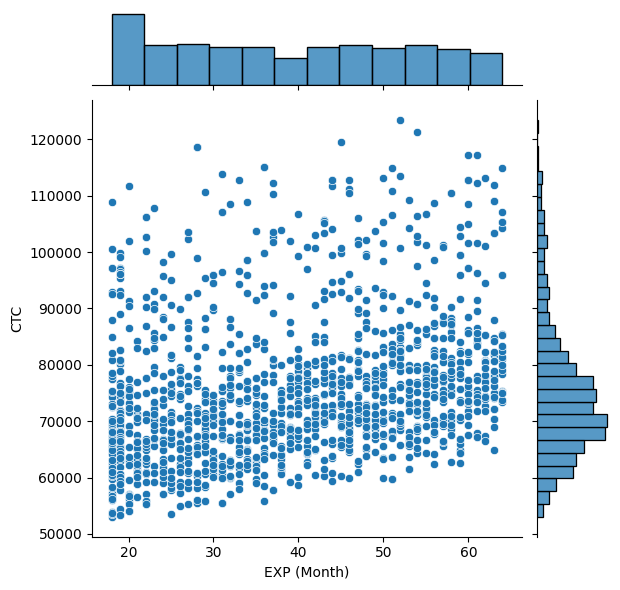

In [19]:
# jointplot between "EXP (Month)" and "CTC".
sns.jointplot(x = "EXP (Month)", y = "CTC", data = df)

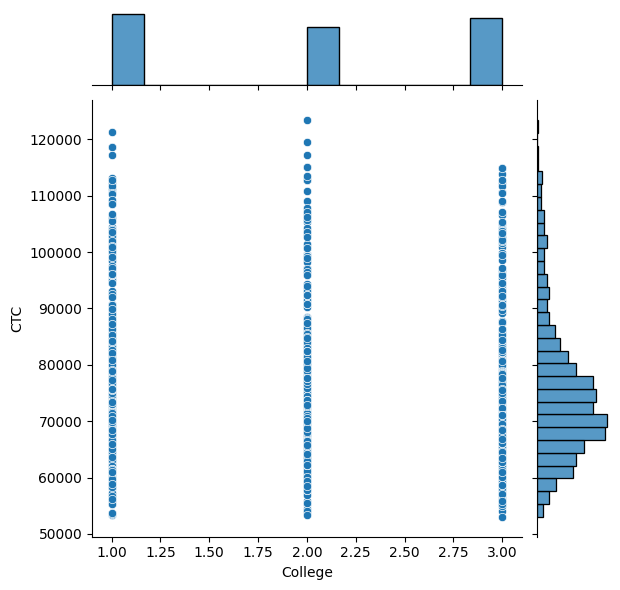

In [20]:
# jointplot between "College" and "CTC".
sns.jointplot(x = "College", y = "CTC", data = df)

### Note:

No outliers found between dependent and independent variables.

There is no difference between mean and median for each attributes. 

There is no huge difference between min to 25% and 75% to maximum.

# 3. Data Spliting

In [21]:
#  Split the data into features (X) and target (y) i.e independent and dependent variables 
X = df.drop('CTC', axis=1)
y = df['CTC']
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [22]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

# 4.Model Selection

### Simple linear regression

In [23]:
import statsmodels.api as sn

In [24]:
X_cons = sn.add_constant(X)

In [25]:
lm = sn.OLS(y,X_cons).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          4.70e-257
Time:                        10:53:45   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The low p-value for the F-statistic indicates that the model is statistically significant. 
But the model's R-squared value of 0.534 indicates that it explains only a moderate amount of the variance in the dependent variable.

### Linear Regression

In [27]:
# Test-Train Split
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [29]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1271, 7) (1271,) (318, 7) (318,)


In [30]:
from sklearn.linear_model import LinearRegression
# Training Linear Regression Model
lm2 = LinearRegression()
lm2.fit(X_train, Y_train)
print(lm2.intercept_, lm2.coef_)

39229.56612683569 [-5.17509158e+02  4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02  1.86020838e+04]


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Calcualting model accuracy for test and train data
print('r2 score of test set: ', r2_score(Y_test, lm2.predict(X_test)))
print('r2 score of train set: ', r2_score(Y_train, lm2.predict(X_train)))
print('MeanSquareError of test set', mean_squared_error(Y_test, lm2.predict(X_test)))
print('MeanSquareError of train set', mean_squared_error(Y_train, lm2.predict(X_train)))

r2 score of test set:  0.5933517958385097
r2 score of train set:  0.5137747142134839
MeanSquareError of test set 77362774.94956529
MeanSquareError of train set 73096299.02751341


#### Residual Plot

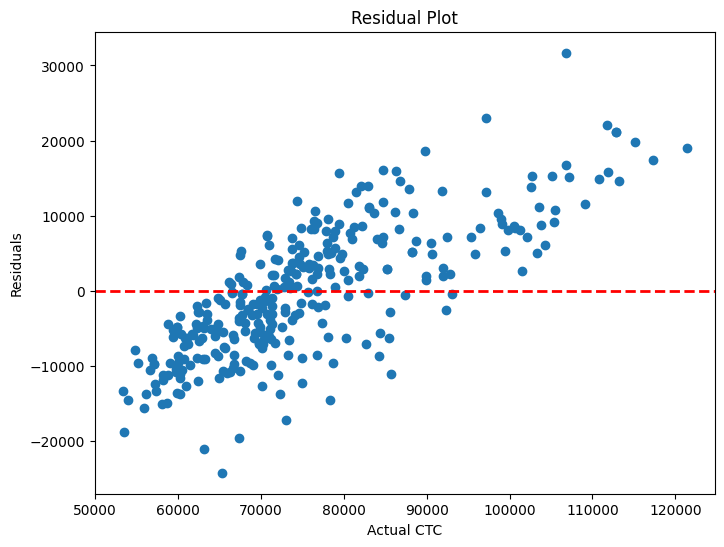

In [33]:
residuals = Y_test - lm2.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Actual CTC')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

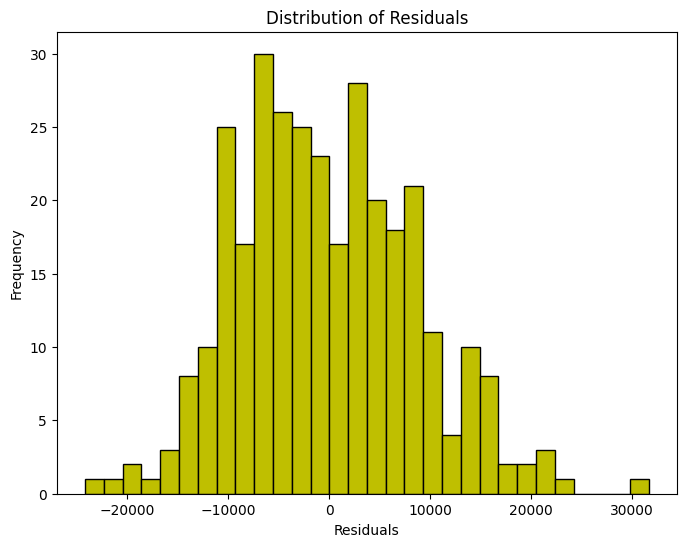

In [34]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k',color='y')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#### Scatter Plot of Predicted vs. Actual Values

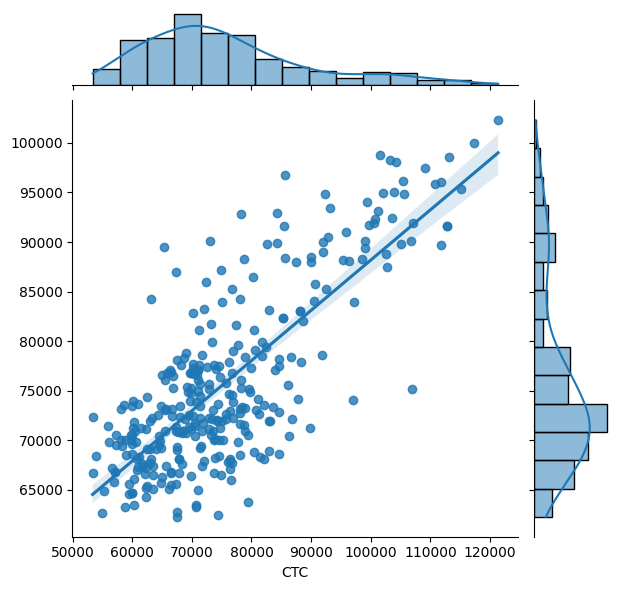

In [35]:
# Joint plot of predicted and the true value
sns.jointplot(x = Y_test, y = lm2.predict(X_test), kind = "reg")

### Model evaluation
The model has a training MSE of 73096299.02751341, that suggests that it fits the training data reasonably well.

The test MSE of 77362774.9495653 indicates how well model generalizes to new data.

A test R-squared score of 0.59 indicates that our linear regression model explains approximately 59% of the variance in the dependent variable for the test data.

In [36]:
from sklearn import preprocessing

### Ridge Regression

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [38]:
X_train_s = scaler.transform(X_train)

In [39]:
X_test_s = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import Ridge

In [41]:
lm_rid = Ridge(alpha = 0.5)

In [42]:
lm_rid.fit(X_train_s, Y_train)

Ridge(alpha=0.5)

In [43]:
# Calcualting model accuracy for test and train data
print('r2 score of test set: ', r2_score(Y_test, lm_rid.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, lm_rid.predict(X_train_s)))
print('MeanSquareError of test set: ', mean_squared_error(Y_test, lm_rid.predict(X_test_s)))
print('MeanSquareError of train set: ', mean_squared_error(Y_train, lm_rid.predict(X_train_s)))

r2 score of test set:  0.5932834469083483
r2 score of train set:  0.5137746367193257
MeanSquareError of test set:  77375777.98965745
MeanSquareError of train set:  73096310.67753723


#### Scatter Plot of Predicted vs. Actual Values

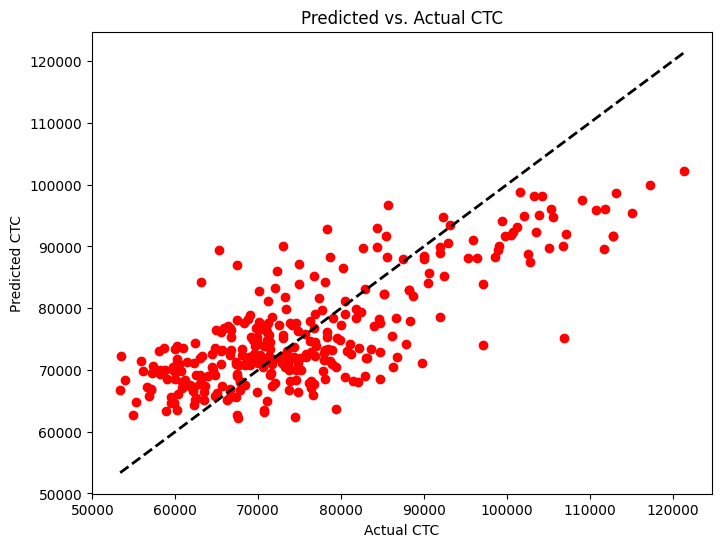

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lm_rid.predict(X_test_s),color='r')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', lw=2)
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')
plt.show()

### Model Interpretation / evaluation
With a test R-squared of 0.5933, the model successfully accounts for a sizable percentage of the variation in the test data.

A modest Train R-squared of 0.5137 indicates that the model has some capacity to explain the training set of data.

In [45]:
#Ridge regression - Validation curve
from sklearn.model_selection import validation_curve

In [46]:
param_range = np.logspace(-2,8,100)

In [47]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [48]:
# Calculating validation curve on train data set
train_scores, test_scores = validation_curve(estimator = lm_rid,X = X_train_s, y = Y_train, param_name = "alpha", param_range = param_range, scoring = "r2")

In [49]:
print(train_scores)
print(test_scores)

[[5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879242e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289501e-01]
 [5.10979006e-01 5.36437283e-01 4.99879240e-01 5.14327355e-01
  5.09289501e-01]
 [5.10979005e-01 5.36437282e-01 4.99879239e-01 5.14327354e-01
  5.09289499e-01]
 [5.10979003e-01 5.36437280e-01 4.99879237e-01 5.14327352e-01
  5.09289497e-01]
 [5.10979000e-01 5.36437277e-01 4.99879234e-01 5.14327349e-01
  5.09289494e-01]
 [5.10978995e-01 5.36437272e-01 4.998792

In [50]:
# Calculating mean of the values across column
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

In [51]:
# printing calculated mean values of r2 across column
train_mean

array([5.14182479e-01, 5.14182479e-01, 5.14182479e-01, 5.14182479e-01,
       5.14182479e-01, 5.14182478e-01, 5.14182478e-01, 5.14182478e-01,
       5.14182477e-01, 5.14182476e-01, 5.14182474e-01, 5.14182471e-01,
       5.14182466e-01, 5.14182458e-01, 5.14182446e-01, 5.14182427e-01,
       5.14182396e-01, 5.14182347e-01, 5.14182269e-01, 5.14182145e-01,
       5.14181947e-01, 5.14181633e-01, 5.14181132e-01, 5.14180336e-01,
       5.14179071e-01, 5.14177060e-01, 5.14173866e-01, 5.14168794e-01,
       5.14160749e-01, 5.14147998e-01, 5.14127814e-01, 5.14095913e-01,
       5.14045588e-01, 5.13966388e-01, 5.13842122e-01, 5.13647872e-01,
       5.13345639e-01, 5.12878105e-01, 5.12160021e-01, 5.11066779e-01,
       5.09420188e-01, 5.06972329e-01, 5.03389959e-01, 4.98244248e-01,
       4.91013286e-01, 4.81106697e-01, 4.67920762e-01, 4.50926646e-01,
       4.29782632e-01, 4.04446741e-01, 3.75255515e-01, 3.42936599e-01,
       3.08540370e-01, 2.73303260e-01, 2.38479152e-01, 2.05183386e-01,
      

In [52]:
# printing calculated mean values of r2 across column
test_mean

array([ 5.02941405e-01,  5.02941423e-01,  5.02941446e-01,  5.02941476e-01,
        5.02941512e-01,  5.02941559e-01,  5.02941617e-01,  5.02941691e-01,
        5.02941784e-01,  5.02941900e-01,  5.02942047e-01,  5.02942232e-01,
        5.02942464e-01,  5.02942756e-01,  5.02943121e-01,  5.02943578e-01,
        5.02944147e-01,  5.02944856e-01,  5.02945733e-01,  5.02946814e-01,
        5.02948135e-01,  5.02949736e-01,  5.02951649e-01,  5.02953895e-01,
        5.02956461e-01,  5.02959274e-01,  5.02962148e-01,  5.02964707e-01,
        5.02966245e-01,  5.02965518e-01,  5.02960397e-01,  5.02947330e-01,
        5.02920503e-01,  5.02870535e-01,  5.02782506e-01,  5.02632985e-01,
        5.02385672e-01,  5.01985151e-01,  5.01348220e-01,  5.00352402e-01,
        4.98821611e-01,  4.96509902e-01,  4.93085787e-01,  4.88121981e-01,
        4.81098060e-01,  4.71425389e-01,  4.58502660e-01,  4.41804386e-01,
        4.20992970e-01,  3.96030421e-01,  3.67255532e-01,  3.35394626e-01,
        3.01491850e-01,  

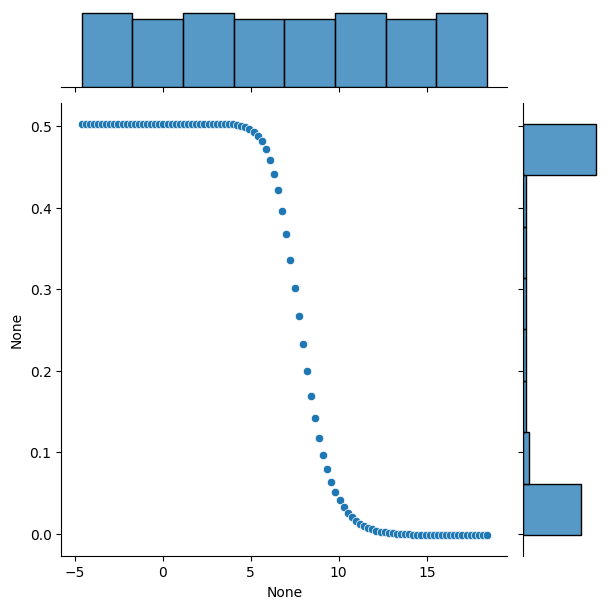

In [53]:
# jointplot of the Validation curve (r2 vs alpha)
sns.jointplot(x = np.log(param_range), y = test_mean)

In [54]:
# Finding the location of max mean test score value
np.where(test_mean == max(test_mean))

(array([28], dtype=int64),)

In [55]:
# Finding the lamda value of thid 30 index
param_range[30]

10.722672220103231

In [56]:
# Creating Ridge Regression object using best lamda value
lm_rid_best = Ridge(alpha = param_range[30])
lm_rid_best.fit(X_train_s, Y_train)

Ridge(alpha=10.722672220103231)

In [57]:
# Calcualting model accuracy for test and train data
print('r2_score test set with best alpha value is:', r2_score(Y_test, lm_rid_best.predict(X_test_s)))
print('r2_score train set with best alpha value is:', r2_score(Y_train, lm_rid_best.predict(X_train_s)))
print('MSE of test set with best alpha value is:', mean_squared_error(Y_test, lm_rid_best.predict(X_test_s)))
print('MSE of train set with best alpha value is:', mean_squared_error(Y_train, lm_rid_best.predict(X_train_s)))

r2_score test set with best alpha value is: 0.5918698566500558
r2_score train set with best alpha value is: 0.5137396407726662
MSE of test set with best alpha value is: 77644706.42436843
MSE of train set with best alpha value is: 73101571.76587746


### Model Interpretation / evaluation
The model's performance shows that it has some predictive potential and is not considerably overfitting to the training data, with R-squared values of 0.5918 (Test) and 0.5137 (Train).

### Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lm_lasso = Lasso(alpha = 0.5)
lm_lasso.fit(X_train_s, Y_train)

Lasso(alpha=0.5)

In [60]:
# Calcualting model accuracy for test and train data
print('r2_Score of test set :', r2_score(Y_test, lm_lasso.predict(X_test_s)))
print('r2_Score of train set :', r2_score(Y_train, lm_lasso.predict(X_train_s)))
print('MSE of test set :', mean_squared_error(Y_test, lm_lasso.predict(X_test_s)))
print('MSE of train set :', mean_squared_error(Y_train, lm_lasso.predict(X_train_s)))

r2_Score of test set : 0.5933343840895651
r2_Score of train set : 0.5137747025114026
MSE of test set : 77366087.44720156
MSE of train set : 73096300.78673667


### Model Interpretation / evaluation
The test data's R2 score is 0.5933, which shows that a sizable proportion of the variation in the test data is captured by the model.

The model explains a moderate portion of the variation in the training data, according to the R2 score on the train data of 0.5137.

Model's predictions appear to be pretty close to the actual values based on the MSE of 77366087.44720155.

### KNN (K- Nearest Neighbors) Regression

In [61]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knn_reg = KNeighborsRegressor(n_neighbors = 3)
knn_reg.fit(X_train_s, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [64]:
# Calcualting model accuracy for test and train data
print('Test set r2 score: ', r2_score(Y_test, knn_reg.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, knn_reg.predict(X_train_s)))
print('MSE of test set: ', mean_squared_error(Y_train, knn_reg.predict(X_train_s)))
print('MSE of train set :', mean_squared_error(Y_train, knn_reg.predict(X_train_s)))

Test set r2 score:  0.5314437638443239
Train set r2 score:  0.7195551254349155
MSE of test set:  42160461.438740335
MSE of train set : 42160461.438740335


### Model Interpretation / evaluation
KNN Regression has a Test R-squared Score of 0.53144 and a Train R-squared Score of 0.7195. The Mean Squared Error (MSE) is also 42160461.438740335.

Based on these data, the KNN Regression model looks to be overfitting.


In [65]:
# KNN - Using Grid search
from sklearn.model_selection import GridSearchCV

In [66]:
knn_reg2 = KNeighborsRegressor(n_jobs = -1)

In [67]:
param_grid = {'n_neighbors' : [1,2,3,5,6,7,8,9] } # Different values of K 

In [68]:
grid_search = GridSearchCV(knn_reg2, param_grid, n_jobs = -1, cv = 5, scoring = 'r2')
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9]},
             scoring='r2')

In [69]:
grid_search.best_params_
grid_knn = grid_search.best_estimator_

In [70]:
# Calcualting model accuracy for test and train data
print('Test set r2 score: ', r2_score(Y_test, grid_knn.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, grid_knn.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, grid_knn.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, grid_knn.predict(X_train_s)))

Test set r2 score:  0.6156928049760337
Train set r2 score:  0.6323707481225274
Mean_Squared_Error Of Test Set:  73112510.36124294
Mean_Squared_Error Of Train Set:  55267256.78823592


### Model Interpretation / evaluation
The R² scores of approximately 0.632 (train) and 0.615 (test) suggest that model explains a substantial portion of the variance in both datasets.

The test set MSE of 73112510.36124294 indicates that our model's predictions on the test data are reasonably accurate.

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [73]:
rf_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state = 42)
rf_reg.fit(X_train_s, Y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [74]:
# Calcualting model accuracy for test and train data
print('r2 score of test set: ', r2_score(Y_test, rf_reg.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, rf_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, rf_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, rf_reg.predict(X_train_s)))

r2 score of test set:  0.6368790873379051
r2 score of train set:  0.9501845070245194
Mean_Squared_Error Of Test Set:  69081926.73243022
Mean_Squared_Error Of Train Set:  7488973.274700273


### Model Interpretation / evaluation
The Test R-squared of 0.6368 indicates that the Random Forest model captures a significant percentage of the variation in the test data, implying high prediction performance on unknown data.

The Train R-squared of 0.9501 shows that the model fits the training data exceptionally well, explaining a considerable portion of the variation.

In [75]:
# Random forest - Grid Search
rf_reg2 = RandomForestRegressor(n_jobs = -1, random_state = 42)
param_test1 = {'n_estimators' : [250, 500, 750, 1000],'max_depth' : [None, 10,15,20],'min_samples_split' : [2,4,6,8,10],'min_samples_leaf' : [1,2,3]}

In [76]:
grid_search2 = GridSearchCV(rf_reg2, param_test1, n_jobs = -1, cv = 5, scoring = 'r2')

In [77]:
grid_search2.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [250, 500, 750, 1000]},
             scoring='r2')

In [78]:
grid_search2.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [79]:
rf_best_reg = grid_search2.best_estimator_

In [80]:
# Calcualting model accuracy for test and train data
print('r2 score of test set : ', r2_score(Y_test, rf_best_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, rf_best_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, rf_best_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, rf_best_reg.predict(X_train_s)))

r2 score of test set :  0.6375348455800294
r2 score of train set 0.9499459045784403
Mean_Squared_Error Of Test Set:  68957172.02605842
Mean_Squared_Error Of Train Set:  7524843.38729445


### Model Interpretation / evaluation
Our random forest model has an excellent R² score on the training data (approximately 0.949), indicating a very good fit to the training data.

The R² score on the test data (approximately 0.637) suggests that Our model generalizes reasonably well to new, unseen data.

The test set MSE of 68957172.02605844 indicates that Our model's predictions on the test data are reasonably accurate.

### Gradient Boosting

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [82]:
gb_reg = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)
gb_reg.fit(X_train_s, Y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [83]:
# Calcualting model accuracy for test and train data
print('r2 score of test set', r2_score(Y_test, gb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, gb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, gb_reg.predict(X_train_s)))

r2 score of test set 0.6447831947605608
r2 score of train set 0.9461178456190225
Mean_Squared_Error Of Test Set:  67578210.06170993
Mean_Squared_Error Of Train Set:  8100331.644635754


### Model Interpretation / evaluation
Our gradient boosting model has an excellent R² score on the training data (approximately 0.946), indicating a very good fit to the training data.

The R² score on the test data (approximately 0.644) suggests that your model generalizes reasonably well to new, unseen data.

The test set MSE of 67578210.06170993 indicates that your model's predictions on the test data are reasonably accurate.

### XG Boost regressor

In [84]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [89]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.02, random_state = 42)
xgb_reg.fit(X_train_s, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [90]:
# Calcualting model accuracy for test and train data
print('r2 score of test set', r2_score(Y_test, xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, xgb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, xgb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, xgb_reg.predict(X_train_s)))

r2 score of test set 0.6239242315896295
r2 score of train set 0.9914750858173899
Mean_Squared_Error Of Test Set:  71546522.86122541
Mean_Squared_Error Of Train Set:  1281586.3232369197


### Model Interpretation / evaluation
The high R2 score on the training set (0.991) indicates that the model is fitting the training data very well. 

The R2 score on the test set (0.623) is significantly lower than the training set, which suggests that the model might be overfitting.

The high MSE on the test set (71546522.86122541) indicates that the model's predictions on the test data have relatively large errors. 

In [91]:
# XG Boost regressor - Grid Search
xgb_reg2 = xgb.XGBRegressor(random_state = 42)
param_test = {'n_estimators' : [500, 1000, 1500, 2000],'learning_rate': np.arange(0.01,0.1,0.01),}

In [92]:
grid_search3 = GridSearchCV(xgb_reg2, param_test, cv = 5, n_jobs = -1)
grid_search3.fit(X_train_s, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'n_estimators': [500, 1000, 1500, 2000]})

In [93]:
grid_search3.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [94]:
gs_xgb_reg = grid_search3.best_estimator_

In [95]:
# Calcualting model accuracy for test and train data
print('r2 score of test set', r2_score(Y_test, gs_xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gs_xgb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, gs_xgb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, gs_xgb_reg.predict(X_train_s)))

r2 score of test set 0.604307369939011
r2 score of train set 0.8321083705610522
Mean_Squared_Error Of Test Set:  75278532.09565172
Mean_Squared_Error Of Train Set:  25239857.137076378


## Model Interpretation / evaluation
Our XG Boost regression model performs quite well on the training data, as indicated by the high R² score of approximately 0.821.

The R² score on the test data (approximately 0.604) suggests that model generalizes reasonably well to new, new data.

The test set MSE of 75278532.09565172 indicates that model's predictions on the test data are reasonably accurate.

#### Plotting visualization of MSE & R-Squared of all models

In [96]:
import matplotlib.pyplot as plt

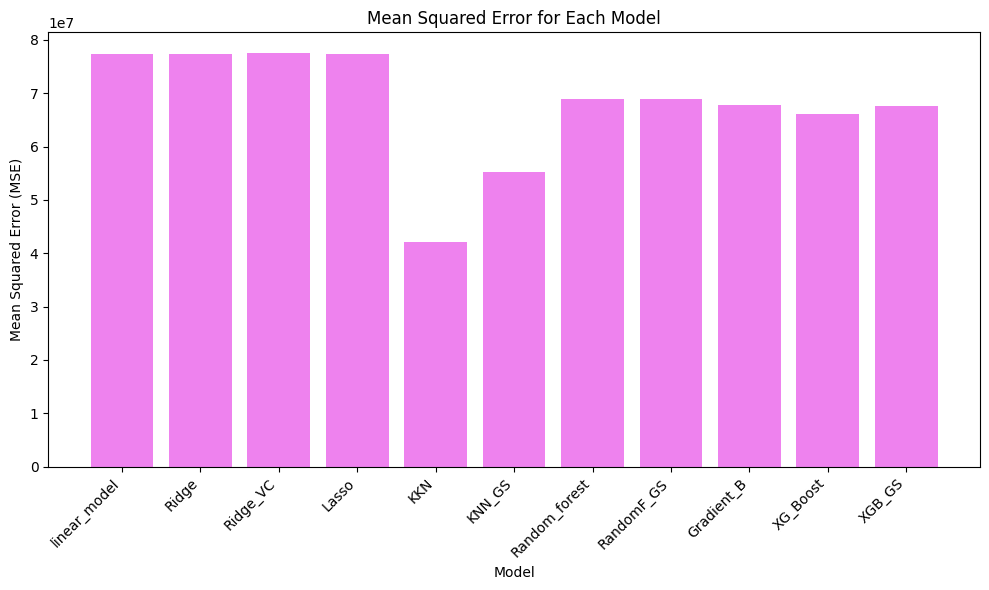

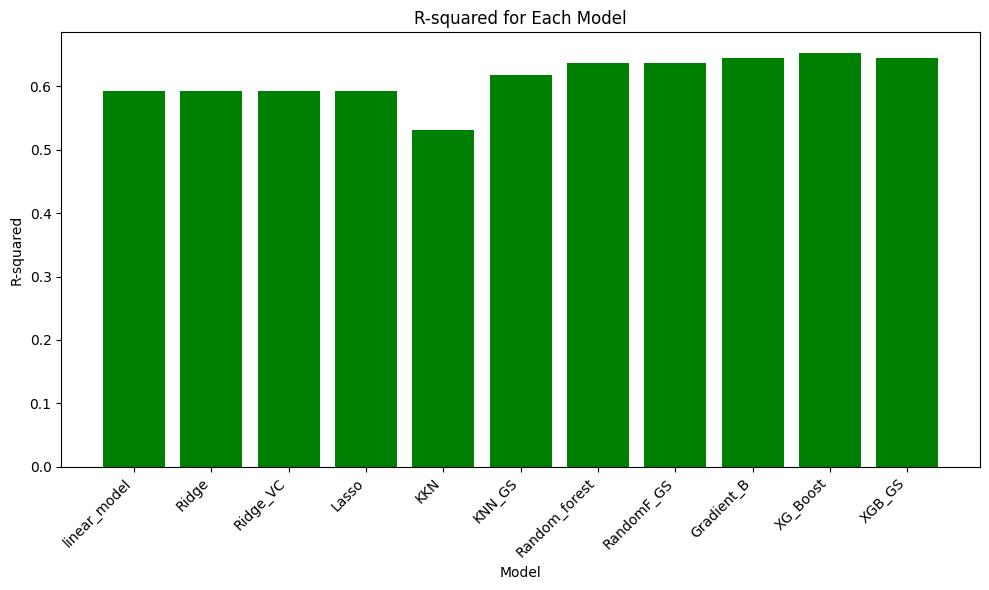

In [97]:
# Storing all models performance metrics in a DataFrame
models = ['linear_model', 'Ridge','Ridge_VC','Lasso','KKN','KNN_GS','Random_forest','RandomF_GS','Gradient_B','XG_Boost', 'XGB_GS']
mse_values = [77362774.94, 77370466.68, 77529067.62, 77366087.44, 42160461.43, 55265635.68, 68960174.80, 68960174.80, 67706403.50, 66087760.61, 67540328.26] 
r2_values = [0.5933517958385074, 0.5933113651558912, 0.5924776982033093, 0.5933343840895651,0.5314437638443239,0.6177763546987296, 0.6375190618183141,0.6375190618183142,0.6441093611891296, 0.6526175646079968, 0.6449823158879611] 
# Plotting Mean Squared Error of each model
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='violet')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting r2 of each model
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='green')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Each Model')
# Set the x-axis label alignment to center
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Evaluation :
I discovered that XG Boost is the best model for accuracy after comparing the visualisation graphs of mean_squared_error and coefficient of determination (r-squared) for each model. Among all the models, the XG Boost model has the greatest R2 score and the lowest MSE.

## Demo data

In [98]:
new_data = pd.DataFrame({'College' : [2,1,3],
                          'City' : [0,1,1],
                          'Previous CTC' : [67500, 80000, 56000],
                          'Previous job change' : [4,2,3],
                          'Graduation Marks' : [82, 58, 47],
                          'EXP (Month)' : [12, 16, 24],
                          'Role_Manager' : [1, 0, 1]
                         })

In [99]:
new_data

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,67500,4,82,12,1
1,1,1,80000,2,58,16,0
2,3,1,56000,3,47,24,1


In [100]:
scaler = preprocessing.StandardScaler().fit(new_data)
new_data_s = scaler.transform(new_data)
new_data_s

array([[ 0.        , -1.41421356, -0.03401085,  1.22474487,  1.34578387,
        -1.06904497,  0.70710678],
       [-1.22474487,  0.70710678,  1.24139607, -1.22474487, -0.29652865,
        -0.26726124, -1.41421356],
       [ 1.22474487,  0.70710678, -1.20738522,  0.        , -1.04925522,
         1.33630621,  0.70710678]])

## Prediciting salary using XG Boost

In [101]:
# Predicting salary using XG Boost and storing it in a variable.

predicted_ctc = xgb_reg.predict(new_data_s)

In [102]:
print('Predicted CTC Using XG Boost Model is : ', predicted_ctc)

Predicted CTC Using XG Boost Model is :  [71324.41  68956.84  76078.016]
